In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [34]:
nyc = pd.read_csv('vaccine-data/nyc.csv')
houston = pd.read_csv('vaccine-data/Houston.csv')
la = pd.read_csv('vaccine-data/la.csv')
chicago = pd.read_csv('vaccine-data/chicago.csv')

In [ ]:
## Cleaning dataframes

In [23]:
nyc['city'] = 'new york'
nyc['date'] = pd.to_datetime(nyc['DATE'])

In [24]:
new_nyc = nyc[nyc['date'] >= '2021-01-01']
new_nyc['total_doses'] = new_nyc['ADMIN_ALLDOSES_DAILY'] 

C:\Users\christina.sarver\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [25]:
print(new_nyc['date'].nunique())
print(len(new_nyc))

166
166


In [ ]:
#houston

In [35]:
houston['date'] = pd.to_datetime(houston['Date_str'])
new_houston = houston[houston['date'] >= '2021-01-01']
new_houston['total_doses'] = new_houston['Vaccinated']

C:\Users\christina.sarver\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [36]:
new_houston = new_houston.groupby(['date'], as_index=False).sum()
new_houston['city'] = 'houston'

C:\Users\christina.sarver\Anaconda3\envs\learn-env\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


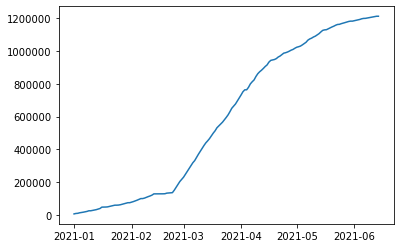

In [10]:
plt.plot(new_houston['date'], new_houston['total_doses'])

In [ ]:
#chicago

In [32]:
chicago['city'] = 'chicago'
chicago['date'] = pd.to_datetime(chicago['Date'])
chicago['total_doses'] = chicago['Total Doses - Daily']
new_chicago = chicago[chicago['date'] >= '2021-01-01']

In [33]:
new_chicago['date'].nunique()

166

In [27]:
la['date'] = pd.to_datetime(la['Date (Dose 1)'])
new_la = la[la['date'] >= '2021-01-01']

In [28]:
new_la = new_la.groupby(['date'], as_index=False).sum()
new_la.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 166 entries, 0 to 165
Data columns (total 5 columns):
date                  166 non-null datetime64[ns]
Dose1_all             166 non-null float64
Population (16+)      166 non-null float64
Population (12-17)    166 non-null float64
Population (65+)      166 non-null float64
dtypes: datetime64[ns](1), float64(4)
memory usage: 7.8 KB


In [29]:
new_la['total_doses'] = new_la['Dose1_all']
new_la['city'] = 'los angeles'

In [30]:
new_la.head()

,date,Dose1_all,Population (16+),Population (12-17),Population (65+),total_doses,city
0,2021-01-01,1112.0,8325489.0,253131.0,1373617.0,1112.0,los angeles
1,2021-01-02,4548.0,8325489.0,253131.0,1373617.0,4548.0,los angeles
2,2021-01-03,986.0,8325489.0,253131.0,1373617.0,986.0,los angeles
3,2021-01-04,12831.0,8325489.0,253131.0,1373617.0,12831.0,los angeles
4,2021-01-05,14230.0,8325489.0,253131.0,1373617.0,14230.0,los angeles


In [ ]:
## Merging dataframes

In [16]:
def to_merge(dataframe):
    city_subset = dataframe[['date', 'city', 'total_doses']]
    return(city_subset)

In [17]:
nyc_merge = to_merge(new_nyc)
houston_merge  = to_merge(new_houston)
chicago_merge  = to_merge(new_chicago)
la_merge  = to_merge(new_la)

In [18]:
combined = pd.concat([nyc_merge, houston_merge, chicago_merge, la_merge], ignore_index=True, sort=False)

In [19]:
ordered_combined = combined.sort_values(by='date')

In [21]:
ordered_combined.tail(10)

,date,city,total_doses
161,2021-06-11,new york,25893
329,2021-06-11,chicago,5664
325,2021-06-11,houston,1207693
326,2021-06-12,houston,1210132
162,2021-06-12,new york,23412
330,2021-06-12,chicago,6908
327,2021-06-13,houston,1212310
163,2021-06-13,new york,6018
331,2021-06-13,chicago,1469
328,2021-06-14,houston,1212310
